In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
import time

from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import warnings
warnings.filterwarnings('ignore')



In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())


In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [7]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), [n])

In [8]:
def cccZ():
    #Triple Control Z Rotation
    qc = QuantumCircuit(4)
    qc.cp(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cp(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cp(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    gate = qc.to_gate(label=' cccZ')
    return gate

In [9]:
def groverDiffusionOp():
    #Inversion along the mean
    circ = QuantumCircuit(4)
    circ.h(range(4))
    circ.x(range(4))
    circ.append(cccZ(), [0, 1, 2, 3])
    circ.x(range(4))
    circ.h(range(4))
    gate = circ.to_gate(label=" Diffusion")
    return gate

In [10]:
def groverOracle(n):
    #Takes in 4-bit string and returns Gate
    #Grover Oracle
    #Inversion
    circ = QuantumCircuit(4)
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    circ.append(cccZ(), [0, 1, 2, 3])
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    gate = circ.to_gate(label=' Grover Oracle')
    return gate

In [28]:
def groverIterate(inp):
    circ = QuantumCircuit(4)
    circ.append(groverOracle(inp), [0, 1, 2, 3])
    circ.append(groverDiffusionOp(), [0, 1, 2, 3])
    gate = circ.to_gate(label = ' Grover Iterate')
    return gate

In [33]:
circ = makeCirc(4, '0000')
circ.h(range(4))

0000


In [34]:
circ.append(groverIterate('0010'), [0, 1, 2, 3])

In [35]:
circ.measure(range(4), range(4))

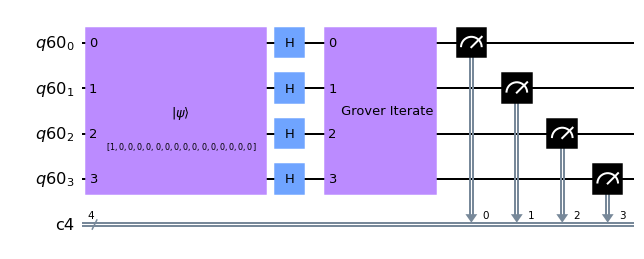

In [36]:
circ.draw('mpl')

In [ ]:
#barebone
circ = makeCirc(4, '0000')
circ.h(range(4))
n = '0100'
for i in range(0):
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    circ.cp(pi/4, 0, 3)
    circ.cx(0, 1)
    circ.cp(-pi/4, 1, 3)
    circ.cx(0, 1)
    circ.cp(pi/4, 1, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
        
        
    circ.h(range(4))
    circ.x(range(4))
    circ.cp(pi/4, 0, 3)
    circ.cx(0, 1)
    circ.cp(-pi/4, 1, 3)
    circ.cx(0, 1)
    circ.cp(pi/4, 1, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.x(range(4))
    circ.h(range(4))
    display(getBloch(circ))
circ.measure(range(4), range(4))

In [ ]:
plot_histogram(getHisto(4096, circ))

In [ ]:
array_to_latex(getPTrace(circ, 0))